# Breast cancer diagnostic

In [2]:
# import class:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score
from sklearn.ensemble import AdaBoostClassifier

# Load and proccess the data

In [3]:

data = pd.read_csv("breast cencer data\data.csv")
M = 1 # malignant
B = 0 # benign
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [M if each == "M" else B for each in data.diagnosis]
gnb = GaussianNB()
optional_c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
vc = data["diagnosis"].value_counts()
scores = {}
print("malignant count: ", vc[0], " (", np.around((vc[0]/569) *100, 1),"%)", "\nbenign count: ", vc[1], " (", np.around((vc[1]/569) *100, 1),"%)")
rocs = {}
data

malignant count:  357  ( 62.7 %) 
benign count:  212  ( 37.3 %)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# split to x matrix and y vector
y = data.pop("diagnosis")
x = data
# normalization data
scalar = StandardScaler()
x = scalar.fit_transform(x)
print("x matrix shape: ", x.shape, "\ny vector shape: ", y.shape)
x[:1,]

x matrix shape:  (569, 30) 
y vector shape:  (569,)


array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
x_train_v, x_validation, y_train_v, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=0)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (455, 30)
x test:  (114, 30)
y train:  (455,)
y test:  (114,)


# Running the different machine learning algorithms

## Gaussian Naive Bayes
running gaussian naive base on the data

Number of mislabeled points out of a total 114 points : 11
Accuracy Score: 0.9035087719298246
FPR:  0.08955223880597014 
TPR:  0.8936170212765957 
AUC: 0.9020323912353128 



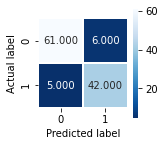

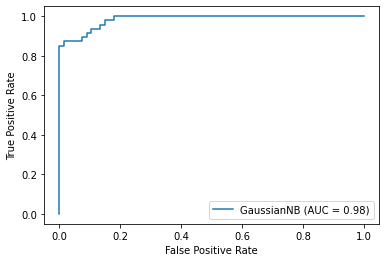

In [6]:
gnb.fit(x_train, y_train)
gnbPrediction = gnb.predict(x_test)
gnbScore= fbeta_score(y_test, gnbPrediction, average='micro', beta= 0.5)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != gnbPrediction).sum()))
scores['gnb'] = gnbScore

confussionMatrix = metrics.confusion_matrix(y_test, gnbPrediction)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy Score: {0}'.format(gnbScore))

fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
auc = metrics.roc_auc_score(y_test, gnbPrediction)
print('FPR: ', fpr, '\nTPR: ', tpr, '\nAUC:', auc, '\n')
rocs["gnb"] = [fpr, tpr]
metrics.plot_roc_curve(gnb, x_test, y_test)
plt.show()

## Logistic Regression
start by finding optimal c to use in l2 regulation, find best classes weight, then run the algorithm and show score and confusion matrix and roc curve

In [7]:
lr_best_score = 0
lr_optimal_c = 0

for c in optional_c:
  lr = LogisticRegression(penalty='l2', C = c, max_iter = 1000,class_weight={0:0.38, 1: 0.61})
  lr.fit(x_train_v, y_train_v)
  lrPredictions = lr.predict(x_validation)
  score = fbeta_score(y_validation, lrPredictions, average='micro', beta=0.5)

  if lr_best_score < score:
    lr_best_score = score
    lr_optimal_c = c
  # print( "When C = ", c , ", the score is: " , score, "\n")
print("The optimal c is: ", lr_optimal_c, ", the score is: ", lr_best_score)


The optimal c is:  0.1 , the score is:  0.9780219780219781


In [8]:
weights = [[0.2, 0.8], [0.3, 0.7], [0.4, 0.61], [0.1, 0.9], [1,2], [10, 100] ]
lr_best_score = 0
lr_optimal_w = []

for w in weights:
  lr = LogisticRegression(penalty='l2', C = lr_optimal_c, max_iter = 1000,class_weight={0:w[0], 1:w[1]})
  lr.fit(x_train_v, y_train_v)
  lrPredictions = lr.predict(x_validation)
  score = fbeta_score(y_validation, lrPredictions, average='weighted', beta= 0.3)
  print("the score for ", w, " is ", score)

  if lr_best_score < score:
    lr_best_score = score
    lr_optimal_w = w.copy()
    
print("The optimal weight is: class 0 (benign) = ", lr_optimal_w[0] , ", and class 1 (malignant) = ", lr_optimal_w[1] , ", the score is: ", lr_best_score)

the score for  [0.2, 0.8]  is  0.9571128503023202
the score for  [0.3, 0.7]  is  0.967354787844066
the score for  [0.4, 0.61]  is  0.978021978021978
the score for  [0.1, 0.9]  is  0.9246285738394106
the score for  [1, 2]  is  0.967354787844066
the score for  [10, 100]  is  0.9286033244349781
The optimal weight is: class 0 (benign) =  0.4 , and class 1 (malignant) =  0.61 , the score is:  0.978021978021978


Number of mislabeled points out of a total 114 points : 3
Accuracy Score: 0.9736882431339813 

FPR:  0.014925373134328358 
TPR:  0.9574468085106383 
AUC: 0.971260717688155 



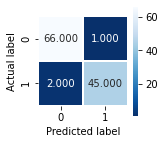

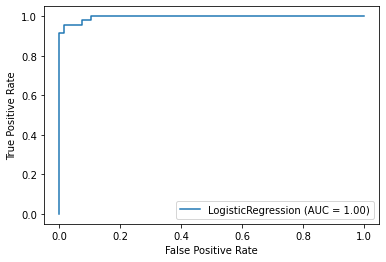

In [9]:
logisticRegr = LogisticRegression(penalty='l2', C = lr_optimal_c, max_iter = 3000, class_weight={0:lr_optimal_w[0], 1: lr_optimal_w[1]})
logisticRegr.fit(x_train, y_train) # training the model on the training data
lrPredictions = logisticRegr.predict(x_test)
lrScore = fbeta_score(y_test, lrPredictions, average='weighted', beta=0.5)
scores["lr"] = lrScore

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != lrPredictions).sum()))

confussionMatrix = metrics.confusion_matrix(y_test, lrPredictions)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('Accuracy Score: {0}'.format(lrScore), "\n")

# fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
# tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
fpr, tpr, thresh = metrics.roc_curve(y_test, lrPredictions)
auc = metrics.roc_auc_score(y_test, lrPredictions)
rocs["lr"] = [fpr, tpr]
print('FPR: ', fpr[1], '\nTPR: ', tpr[1], '\nAUC:', auc, '\n')
metrics.plot_roc_curve(logisticRegr, x_test, y_test)
plt.show()

## AdaBoost Classifier
start by finding the optimal N estimator and learning rate, then run the algorithm and show score and confusion matrix

In [10]:
adb_best_score = 0
adb_optimal_e = 0
optional_e = [10, 30, 40, 50, 100]

for e in optional_e:
    adb = AdaBoostClassifier(n_estimators=e, learning_rate=1, random_state=0)
    adb.fit(x_train_v, y_train_v)
    adbPredict = adb.predict(x_validation)
    adb_score = fbeta_score(y_validation, adbPredict, average='micro', beta=0.01)

    if adb_best_score < adb_score:
        adb_best_score = adb_score
        adb_optimal_e = e
print("The optimal e is: ", adb_optimal_e, ", the score is: ", adb_best_score)

The optimal e is:  40 , the score is:  0.967032967032967


In [11]:
adb_best_score = 0
adb_optimal_r = 0
optional_r = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for r in optional_r:
    adb = AdaBoostClassifier(n_estimators=adb_optimal_e, learning_rate=r, random_state=0)
    adb.fit(x_train_v, y_train_v)
    adbPredict = adb.predict(x_validation)
    adb_score = fbeta_score(y_validation, adbPredict, average='micro', beta=0.01)

    if adb_best_score < adb_score:
        adb_best_score = adb_score
        adb_optimal_r = r
  # print( "When C = ", c , ", the score is: " , score, "\n")
print("The optimal r is: ", adb_optimal_r, ", the score is: ", adb_best_score)

The optimal r is:  1 , the score is:  0.967032967032967


Number of mislabeled points out of a total 114 points : 4
Accuracy Score: 0.9649122807017544
FPR:  0.029850746268656716 
TPR:  0.9574468085106383 
AUC: 0.9637980311209908 



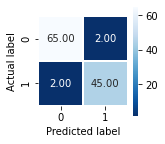

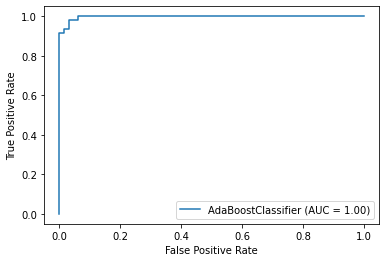

In [12]:
adb = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate= adb_optimal_r)
adb.fit(x_train, y_train)
adbPredict = adb.predict(x_test)
adbScore = fbeta_score(y_test, adbPredict, average='weighted', beta=0.01)
scores['adb'] = adbScore

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != adbPredict).sum()))

confussionMatrix = metrics.confusion_matrix(y_test, adbPredict)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('Accuracy Score: {0}'.format(adbScore))

fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
auc = metrics.roc_auc_score(y_test, adbPredict)
rocs["adb"] = [fpr, tpr]

print('FPR: ', fpr, '\nTPR: ', tpr, '\nAUC:', auc, '\n')
metrics.plot_roc_curve(adb, x_test, y_test)
plt.show()


## Linear Support Vector Machine

In [13]:
lsvc_best_score = 0
lsvc_optimal_c = 0

for c in optional_c:
  lsvc = LinearSVC(C= c, penalty="l2",loss="hinge", dual=True, multi_class="ovr", max_iter= 200000)
  lsvc.fit(x_train_v, y_train_v)
  lsvcPredictions = lsvc.predict(x_validation)
  lsvc_score = fbeta_score(y_validation, lsvcPredictions, average='micro', beta=0.5)

  if lsvc_best_score < lsvc_score:
     lsvc_best_score = lsvc_score
     lsvc_optimal_c = c
  # print( "When C = ", c , ", the score is: " , score, "\n")
print("The optimal c is: ", lsvc_optimal_c, ", the score is: ", lsvc_best_score)

The optimal c is:  0.01 , the score is:  0.9780219780219781


Number of mislabeled points out of a total 114 points : 4
Accuracy Score: 0.9650114227400741
FPR:  0.014925373134328358 
TPR:  0.9361702127659575 
AUC: 0.9606224198158145 



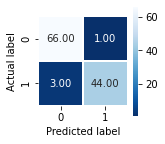

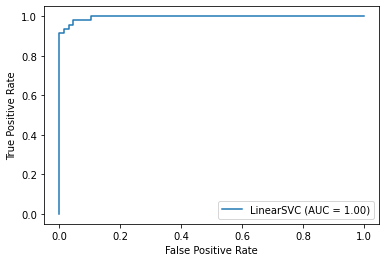

In [14]:
lsvc = LinearSVC(C= lsvc_optimal_c, penalty="l2",loss="hinge", dual=True, multi_class="ovr")
lsvc.fit(x_train, y_train)
lsvcPredict = lsvc.predict(x_test)
lsvcScore = fbeta_score(y_test, lsvcPredict, average='weighted', beta=0.5)
scores["lsvc"] = lsvcScore
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != lsvcPredict).sum()))

confussionMatrix = metrics.confusion_matrix(y_test, lsvcPredict)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('Accuracy Score: {0}'.format(lsvcScore))

fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
auc = metrics.roc_auc_score(y_test, lsvcPredict)
rocs["lsvc"] = [fpr, tpr]
print('FPR: ', fpr, '\nTPR: ', tpr, '\nAUC:', auc, '\n')
metrics.plot_roc_curve(lsvc, x_test, y_test)
plt.show()


# Feature selection

importance order: [22 23 20  7 27  2  6  0  3 13 26 12 10 25  5 17 21 16 24  1 28  4 15 29
  8 19 18 14  9 11]


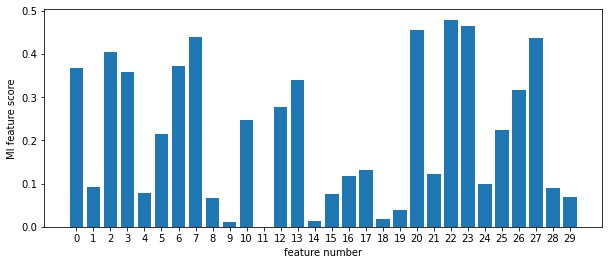

In [15]:
mi = mutual_info_classif(x,y)
features = np.arange(0, 30, 1)
plt.figure(figsize=(10, 4))

plt.bar(features,mi)
plt.xticks(features)
plt.xlabel("feature number")
plt.ylabel("MI feature score")

important_MI =np.flip(np.argsort(mi))
print("importance order:", important_MI)
plt.show()


from the graph we can easily see the important features according to mutual information algorithm

### Logistic Regression

In [16]:
#find optimal k
lr_optimal_k = 0
lr_best_score = 0
for i in range (1,30):
    mi_x_new = SelectKBest(mutual_info_classif, k=i).fit_transform(x, y)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(mi_x_new, y, test_size=0.20, random_state=0)

    logisticRegr.fit(x_train_new, y_train_new) # training the model on the training data
    lrPredictions = logisticRegr.predict(x_test_new)
    lrScore = fbeta_score(y_test, lrPredictions, average='weighted', beta=0.5)
    
    if lrScore > lr_best_score:
        lr_best_score = lrScore
        lr_optimal_k = i
print("optimal number of fetures:" ,lr_optimal_k)
mi_x_new = SelectKBest(mutual_info_classif, k=lr_optimal_k).fit_transform(x, y)
print("According to MI algorithm the ",lr_optimal_k, "  most importent features are: ",np.sort(important_MI[:lr_optimal_k]))

optimal number of fetures: 21
According to MI algorithm the  21   most importent features are:  [ 0  1  2  3  5  6  7 10 12 13 16 17 20 21 22 23 24 25 26 27 28]


Number of mislabeled points out of a total 114 points : 2
Accuracy Score: 0.9824561403508771


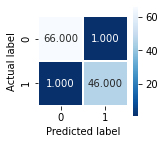

In [17]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(mi_x_new, y, test_size=0.20, random_state=0)

logisticRegr.fit(x_train_new, y_train_new) # training the model on the training data
lrPredictions = logisticRegr.predict(x_test_new)
lrScore = fbeta_score(y_test, lrPredictions, average='weighted', beta=0.1)

print("Number of mislabeled points out of a total %d points : %d" % (x_test_new.shape[0], (y_test_new != lrPredictions).sum()))

confussionMatrix = metrics.confusion_matrix(y_test_new, lrPredictions)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
scores['lr_mi'] = lrScore
print('Accuracy Score: {0}'.format(lrScore))

## try feature selection from model and run the model on the new data

In [18]:
"""
LogisticRegression
"""

logisticRegr.fit(x_train, y_train)
model = SelectFromModel(logisticRegr, prefit=True)
lr_x_new = model.transform(x)

feature_index = 0
modle_features = []
for col in x[0]:
    if col in lr_x_new:
        modle_features.append(feature_index)
    feature_index+=1
print("When using Logistic Regression algorithm the most importent features are: ", modle_features )

When using Logistic Regression algorithm the most importent features are:  [0, 1, 2, 3, 6, 7, 10, 12, 13, 20, 21, 22, 23, 24, 26, 27, 28]


Number of mislabeled points out of a total 114 points : 2
Accuracy Score: 0.9824561403508771
FPR:  0.014925373134328358 
TPR:  0.9787234042553191 
AUC: 0.9818990155604953 



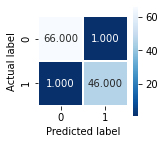

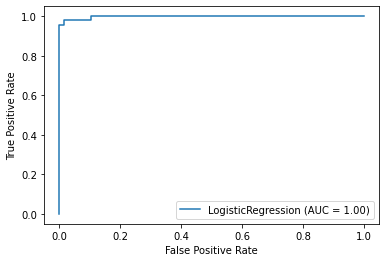

In [19]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(lr_x_new, y, test_size=0.20, random_state=0)

logisticRegr.fit(x_train_new, y_train_new)
lrPredict = logisticRegr.predict(x_test_new)
lrcScore = fbeta_score(y_test_new, lrPredict, average='weighted', beta=0.5)

print("Number of mislabeled points out of a total %d points : %d" % (x_test_new.shape[0], (y_test_new != lrPredict).sum()))

confussionMatrix = metrics.confusion_matrix(y_test_new, lrPredict)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('Accuracy Score: {0}'.format(lrcScore))

fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
auc = metrics.roc_auc_score(y_test_new, lrPredict)
scores["lr_model"] = lrScore
print('FPR: ', fpr, '\nTPR: ', tpr, '\nAUC:', auc, '\n')
metrics.plot_roc_curve(logisticRegr, x_test_new, y_test_new)
plt.show()

In [20]:
"""
adaboost
"""
adb = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate= adb_optimal_r)
adb.fit(x_train, y_train)
model = SelectFromModel(adb, prefit=True)
adb_x_new = model.transform(x)

feature_index = 0
modle_features = []
for col in x[0]:
    if col in adb_x_new:
        modle_features.append(feature_index)
    feature_index+=1
print("When using adaboost algorithm the most importent features are: ", modle_features )

When using adaboost algorithm the most importent features are:  [1, 4, 5, 7, 11, 12, 13, 15, 18, 19, 21, 22, 23, 26, 27]


Number of mislabeled points out of a total 114 points : 4
Accuracy Score: 0.9649122807017544
FPR:  0.029850746268656716 
TPR:  0.9574468085106383 
AUC: 0.9637980311209908 



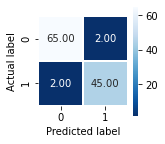

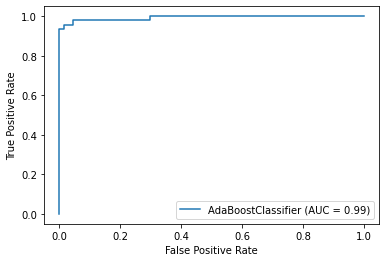

In [21]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(adb_x_new, y, test_size=0.20, random_state=0)


adb = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate= adb_optimal_r)
adb.fit(x_train_new, y_train_new)
adbPredict = adb.predict(x_test_new)
adbScore = fbeta_score(y_test_new, adbPredict, average='weighted', beta=0.01)

print("Number of mislabeled points out of a total %d points : %d" % (x_test_new.shape[0], (y_test_new != adbPredict).sum()))

confussionMatrix = metrics.confusion_matrix(y_test_new, adbPredict)
plt.figure(figsize=(2,2))
sns.heatmap(confussionMatrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('Accuracy Score: {0}'.format(adbScore))

fpr = (confussionMatrix[0][1]) / (confussionMatrix[0][1] + confussionMatrix[0][0])
tpr = (confussionMatrix[1][1]) / (confussionMatrix[1][1] + confussionMatrix[1][0])
scores["adb_model"] = adbScore
auc = metrics.roc_auc_score(y_test_new, adbPredict)
print('FPR: ', fpr, '\nTPR: ', tpr, '\nAUC:', auc, '\n')
metrics.plot_roc_curve(adb, x_test_new, y_test_new)
plt.show()


# Summary

the algorithm with the best score: lr_mi


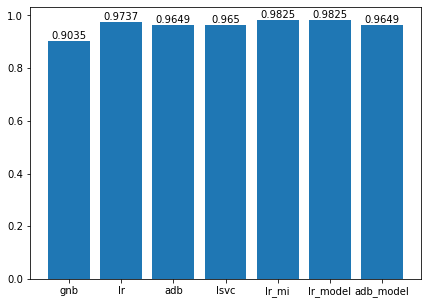

In [22]:
#scores
plt.figure(figsize=(7, 5))
plt.bar(scores.keys(), scores.values())
for k in scores.keys():
    plt.annotate(str(np.round(scores[k], 4)), xy=(k, scores[k]), ha='center', va='bottom')
print("the algorithm with the best score:" , max(scores, key=scores.get))